### Importing Libraries

In [96]:
import requests
import pandas as pd
import numpy as np

from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Main Data Extracted from [public.opendatasoft.com](https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/)

In [138]:
raw = pd.read_csv('./us-zip-code-latitude-and-longitude.csv',sep=';')
raw.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,55795,Willow River,MN,46.317812,-92.84315,-6,1,"46.317812,-92.84315"
1,45388,Yorkshire,OH,40.328535,-84.47938,-5,1,"40.328535,-84.47938"
2,39483,Foxworth,MS,31.218509,-89.90761,-6,1,"31.218509,-89.90761"
3,31503,Waycross,GA,31.205194,-82.37534,-5,1,"31.205194,-82.37534"
4,45833,Delphos,OH,40.841409,-84.34178,-5,1,"40.841409,-84.34178"


### California Cities

In [3]:
ca = raw[raw.State=='CA'].sort_values('State')
ca.head()

### Nevada Cities

In [4]:
nv = raw[raw.State=='NV'].sort_values('State')
nv.head()

### Washington Cities

In [5]:
wa = raw[raw.State=='WA'].sort_values('State')
wa.head()

### Florida Cities

In [6]:
fl = raw[raw.State=='FL'].sort_values('State')
fl.head()

### New York Cities

In [5]:
ny = raw[raw.State=='NY'].sort_values('State')
print(len(ny.Zip.unique()))
# ny.to_csv('./ny.csv',index=False)
ny.head()

2281


,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
12,13758,East Pharsalia,NY,42.583518,-75.721931,-5,1,"42.583518,-75.721931"
28908,11101,Long Island City,NY,40.745341,-73.939070,-5,1,"40.745341,-73.93907"
28907,10023,New York,NY,40.776099,-73.982850,-5,1,"40.776099,-73.98285"
28891,10292,New York,NY,40.780751,-73.977182,-5,1,"40.780751,-73.977182"
28890,14009,Arcade,NY,42.582693,-78.400690,-5,1,"42.582693,-78.40069"


### Combining Geographical Data with Foursquare Data

In [9]:
code = 'RILA0BKQSO00ZAI3R4NOBF2QY40PEFLZSDY0OTPYSJUCQIMG'
CLIENT_ID = 'IDQPORJB14MMWJSIZZ1VOF4FQOJU5TKYIDRMD3U51YU4K0HC' # your Foursquare ID
CLIENT_SECRET = '5B2GKQ3DQPO4XTA133KZX2S434ITQ4JUWZFWQDE3QTK3UWZT' # your Foursquare Secret
ACCESS_TOKEN = 'S3DM0BPCF5KZJOCH3VQT5KNN2SVLFKPUJMVD3KRJECCYX2F0' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 50
#https://foursquare.com/oauth2/access_token?client_id=IDQPORJB14MMWJSIZZ1VOF4FQOJU5TKYIDRMD3U51YU4K0HC&client_secret=5B2GKQ3DQPO4XTA133KZX2S434ITQ4JUWZFWQDE3QTK3UWZT&grant_type=authorization_code&redirect_uri=https://www.google.com&code=RILA0BKQSO00ZAI3R4NOBF2QY40PEFLZSDY0OTPYSJUCQIMG
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IDQPORJB14MMWJSIZZ1VOF4FQOJU5TKYIDRMD3U51YU4K0HC
CLIENT_SECRET:5B2GKQ3DQPO4XTA133KZX2S434ITQ4JUWZFWQDE3QTK3UWZT


In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=300):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        
        req = requests.get(url).json() 
        
        # return only relevant information for each nearby venue
        try:
            results = req["response"]['groups'][0]['items']
            
            venues_list.append([(
                name, 
                lat, 
                lng,
                v['venue']['id'],
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']
            ) for v in results])
            print(x,"Success Zip: ",name)
        except:
            print(x,"Failed Zip: ",name)
            error = req['meta']['errorDetail']
            print(error)

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
        'Zip', 
        'Zip Latitude', 
        'Zip Longitude', 
        'Venue id',
        'Venue', 
        'Venue Latitude', 
        'Venue Longitude', 
        'Venue Category'
    ]
    
    return(nearby_venues)

### Merging Zip Codes with Foursquare: California (In Progress...)

In [10]:
ca_venues = getNearbyVenues(names=ca['Zip'],
                                   latitudes=ca['Latitude'],
                                   longitudes=ca['Longitude']
                                  )
ca_venues.head()

In [11]:
ca_venues.to_csv('./ca_venues.csv', index=False)

In [12]:
nv_venues = getNearbyVenues(names=nv['Zip'],
                                   latitudes=nv['Latitude'],
                                   longitudes=nv['Longitude']
                                  )
nv_venues.head()

In [13]:
nv_venues.to_csv('./nv_venues.csv', index=False)

In [14]:
wa_venues = getNearbyVenues(names=wa['Zip'],
                                   latitudes=wa['Latitude'],
                                   longitudes=wa['Longitude']
                                  )
wa_venues.head()

In [15]:
wa_venues.to_csv('./wa_venues.csv', index=False)

In [16]:
fl_venues = getNearbyVenues(names=fl['Zip'],
                                   latitudes=fl['Latitude'],
                                   longitudes=fl['Longitude']
                                  )
fl_venues.head()

In [17]:
fl_venues.to_csv('./fl_venues.csv', index=False)

In [46]:
ny[ny.Zip == 13345]

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
28832,13345,Greig,NY,43.818705,-75.480342,-5,1,"43.818705,-75.480342"


In [45]:
ny_venues[ny_venues.Zip == 13345]

,Zip,Zip Latitude,Zip Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category


In [40]:
ny_venues = getNearbyVenues(names=ny['Zip'],
                                   latitudes=ny['Latitude'],
                                   longitudes=ny['Longitude']
                                  )
print('The length from ny_venues is: ',len(ny_venues.Zip.unique()))
ny_venues.to_csv('./ny_venues.csv', index=False)
ny_venues.head()

1 Success Zip:  13758
2 Success Zip:  11101
3 Success Zip:  10023
4 Success Zip:  10292
5 Success Zip:  14009
6 Success Zip:  12903
7 Success Zip:  13345
8 Success Zip:  14613
9 Success Zip:  13250
10 Success Zip:  12470
11 Success Zip:  14424
12 Success Zip:  12072
13 Success Zip:  14456
14 Success Zip:  12920
15 Success Zip:  10979
16 Success Zip:  14618
17 Success Zip:  13696
18 Success Zip:  11225
19 Success Zip:  12234
20 Success Zip:  11976
21 Success Zip:  14877
22 Success Zip:  11520
23 Success Zip:  14785
24 Success Zip:  14807
25 Success Zip:  13494
26 Success Zip:  13622
27 Success Zip:  13774
28 Success Zip:  10521
29 Success Zip:  12041
30 Success Zip:  12157
31 Success Zip:  10172
32 Success Zip:  10199
33 Success Zip:  14603
34 Success Zip:  10035
35 Success Zip:  14206
36 Success Zip:  12165
37 Success Zip:  11967
38 Success Zip:  12069
39 Success Zip:  12746
40 Success Zip:  13122
41 Success Zip:  13416
42 Success Zip:  10610
43 Success Zip:  11764
44 Success Zip:  112

,Zip,Zip Latitude,Zip Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,11101,40.745341,-73.93907,49ff6b95f964a5201f701fe3,Dutch Kills,40.747830,-73.940108,Cocktail Bar
1,11101,40.745341,-73.93907,4a6b4dabf964a52065ce1fe3,SculptureCenter,40.746952,-73.941068,Art Museum
2,10023,40.776099,-73.98285,414ccc00f964a520d21c1fe3,Cafe Luxembourg,40.777514,-73.983556,French Restaurant
3,10023,40.776099,-73.98285,5b12bae3c58ed7002c766185,Shakespeare & Co.,40.776419,-73.982133,Bookstore
4,10023,40.776099,-73.98285,49e17f24f964a520d1611fe3,AMC Lincoln Square 13,40.775063,-73.982095,Movie Theater


In [30]:
missed_ny_venues = getNearbyVenues(names=ny.loc[ny.Zip.apply(lambda x: x not in ny_venues.Zip),'Zip'],
                                   latitudes=ny.loc[ny.Zip.apply(lambda x: x not in ny_venues.Zip),'Latitude'],
                                   longitudes=ny.loc[ny.Zip.apply(lambda x: x not in ny_venues.Zip),'Longitude']
                                  )
ny_venues = pd.concat([ny_venues,missed_ny_venues],ignore_index=True)
print('The length from ny_venues is: ',len(ny_venues.Zip.unique()))
ny_venues.to_csv('./ny_venues.csv', index=False)

1 Success Zip:  13758
2 Success Zip:  14009
3 Success Zip:  13345
4 Success Zip:  14613
5 Success Zip:  13250
6 Success Zip:  14424
7 Success Zip:  14456
8 Success Zip:  14618
9 Success Zip:  13696
10 Success Zip:  14877
11 Success Zip:  14785
12 Success Zip:  14807
13 Success Zip:  13494
14 Success Zip:  13622
15 Success Zip:  13774
16 Success Zip:  14603
17 Success Zip:  14206
18 Success Zip:  13416
19 Success Zip:  13634
20 Success Zip:  14240
21 Success Zip:  14542
22 Success Zip:  14733
23 Success Zip:  14873
24 Success Zip:  14568
25 Success Zip:  13601
26 Success Zip:  14133
27 Success Zip:  14605
28 Success Zip:  13761
29 Success Zip:  14836
30 Success Zip:  14620
31 Success Zip:  13361
32 Success Zip:  14136
33 Success Zip:  14718
34 Success Zip:  13315
35 Success Zip:  13679
36 Success Zip:  13755
37 Success Zip:  13411
38 Success Zip:  14803
39 Success Zip:  14224
40 Success Zip:  13903
41 Success Zip:  13302
42 Success Zip:  13825
43 Success Zip:  14549
44 Success Zip:  140

# Get Likes for each venue

In [6]:
def get_likes(venue_ids):
    likes = []
    for x,vid in enumerate(venue_ids):
        try:
            url = 'https://api.foursquare.com/v2/venues/{}/likes?&client_id={}&client_secret={}&v={}'.format(
                    vid,
                    CLIENT_ID, 
                    CLIENT_SECRET,
                    VERSION)
            results = requests.get(url).json()
            likes.append(results["response"]['likes']['count'])
            print(x,vid,"Success with :",results["response"]['likes']['count']," likes")
        except:
            likes.append(-1)
            print(x,"Failed",results['meta']['errorType'], "; ", results['meta']['errorDetail'])
            error = results['meta']['errorDetail']
            if error == 'Quota exceeded':
                missing_values = len(venue_ids) - len(likes)
                missed_likes = [-1 for val in range(missing_values)]
                likes = likes + missed_likes
                break       
    return likes

In [21]:
ca_venues = pd.read_csv("./ca_venues.csv")
print("Shape of DF: ",ca_venues.shape)
ca_venues.head()

Shape of DF:  (8085, 9)


,Zip,Zip Latitude,Zip Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes
0,96157,38.934409,-119.976707,4c17d5924ff90f47a5830d49,The Cork & More,38.933938,-119.975195,Gourmet Shop,8
1,96157,38.934409,-119.976707,4b664e74f964a5204d1d2be3,Rite Aid,38.933294,-119.976270,Pharmacy,10
2,96157,38.934409,-119.976707,4ca10fff54c8a1cd89fda44b,Sierra Pizza,38.934137,-119.975207,Pizza Place,4
3,96157,38.934409,-119.976707,4cfefcf466ee9eb0d126a74e,U.S. Bank ATM,38.933327,-119.977466,ATM,0
4,96157,38.934409,-119.976707,4e4d2eabbd413c4cc66f3c5d,Domino's Pizza,38.933518,-119.978390,Pizza Place,1


In [27]:
ca_venues['Likes'] = get_likes(ca_venues['Venue id'])

0 4c17d5924ff90f47a5830d49 Success
1 4b664e74f964a5204d1d2be3 Success
2 4ca10fff54c8a1cd89fda44b Success
3 4cfefcf466ee9eb0d126a74e Success
4 4e4d2eabbd413c4cc66f3c5d Success
5 4b9afef0f964a52045ea35e3 Success
6 4b5dc1adf964a520126a29e3 Success
7 5865cb57b12d9f3e9422278e Success
8 4ac00102f964a5206b9320e3 Success
9 4e2e13dbc65b80dfd833c271 Success
10 4c098bee3c70b7135ed6275b Success
11 4b898248f964a520413d32e3 Success
12 4ba5559ef964a520f8fb38e3 Success
13 4b5cad74f964a520e73d29e3 Success
14 4c7d79438da18cfae17f9fce Success
15 4cfedb9b3f846dcbbca48d37 Success
16 4a777f00f964a520aee41fe3 Success
17 5a4f16d96f0aa24b6ebc92d9 Success
18 4c8fcb29b6d1a1434b59be0f Success
19 4cc49db6dba3ef3b4c980705 Success
20 5c1b6afdf5e9d7002c1768e6 Success
21 59c93b29ad910e4c798cb03e Success
22 4b2ec4bbf964a5205ee624e3 Success
23 4b81a8f1f964a520f8b530e3 Success
24 4b11d8b6f964a520e38523e3 Success
25 4b5616faf964a520d8ff27e3 Success
26 4bc7b7c492b376b0e856503a Success
27 4aa85f79f964a520085120e3 Success
28

In [39]:
ca_venues = pd.read_csv("./ca_venues.csv")
# ca_venues.loc[:,'Likes'] = get_likes(ca_venues['Venue id']) #For First Interation Only
ca_venues.loc[ca_venues['Likes'] == -1,'Likes'] = get_likes(ca_venues.loc[ca_venues['Likes'] == -1,'Venue id'])
ca_venues.to_csv('./ca_venues.csv',index=False)
len(ca_venues[ca_venues['Likes'] == -1])

0 4b9a82e8f964a52053bc35e3 Success with : 1  likes
1 4bdc69a3afe8c9b6ea4b4f85 Success with : 1  likes
2 4be0a62fcb81c9b6db90668b Success with : 2  likes
3 4c092c1002c9d13a55ba73dd Success with : 2  likes
4 4d8245181ec4224b2be2d792 Success with : 0  likes
5 51bd14a0498e8e4e6a1996c0 Success with : 6  likes
6 4bf743805efe2d7f7fcb6834 Success with : 1  likes
7 56e1e4b6498e9bb93a510054 Success with : 2  likes
8 4d9f91f049afb60cb40fa18d Success with : 0  likes
9 59a5583b93bd633224c414e1 Success with : 1  likes
10 4c6462297f7be21ee7e0f90f Success with : 0  likes
11 4b50c07ef964a520df3027e3 Success with : 0  likes
12 4bae4f88f964a52005a13be3 Success with : 0  likes
13 5f201c012835f147a230782f Success with : 0  likes
14 4c52159a9d642d7fbb799ede Success with : 3  likes
15 5d0076d9f05ca8002d9b7135 Success with : 0  likes
16 51a96718498efd980059672d Success with : 2  likes
17 4f7f041de4b087874a32088f Success with : 0  likes
18 5761c3a5498effc928f027d7 Success with : 0  likes
19 4f32a74019836c91c7e

0

In [41]:
nv_venues = pd.read_csv("./nv_venues.csv")
nv_venues.loc[:,'Likes'] = get_likes(nv_venues['Venue id'])

0 5e28243eafe78b00085548b7 Success with : 0  likes
1 5bce7ce1835c9a002c4deb8a Success with : 0  likes
2 5cd66c9925ecca002cccc5ee Success with : 0  likes
3 4f36df18e4b0f4cfde0397a6 Success with : 1  likes
4 4e8dcf93b8f71a700b458bb0 Success with : 1  likes
5 4b1d867ef964a520b01124e3 Success with : 45  likes
6 4bf1905f189f0f470a69b762 Success with : 7  likes
7 4d4b62022220b1f7c70b2ad2 Success with : 7  likes
8 4dff7af945dd3320c8832e0a Success with : 3  likes
9 4c1522fba1010f4772834d18 Success with : 3  likes
10 4f42bb1ae4b0f4d09df26bf5 Success with : 0  likes
11 4e9ee581e5fa0c382e289414 Success with : 0  likes
12 5062053e498ee60314e8db57 Success with : 0  likes
13 5071aefee4b075dad494ba40 Success with : 0  likes
14 4c2d065c260bc928794b19d3 Success with : 74  likes
15 4b65f4b5f964a520dc0a2be3 Success with : 45  likes
16 4fb877b8e4b04b94beb05a14 Success with : 6  likes
17 4e3daece1495bf24a5de939d Success with : 16  likes
18 4c38d4d418e72d7f081e19f5 Success with : 0  likes
19 501da13ce4b0442

In [42]:
nv_venues.loc[nv_venues['Likes'] == -1,'Likes'] = get_likes(nv_venues.loc[nv_venues['Likes'] == -1,'Venue id'])
nv_venues.to_csv('./nv_venues.csv',index=False)
len(nv_venues[nv_venues['Likes'] == -1])

0

In [28]:
#Part1
fl_venues = pd.read_csv("./fl_venues.csv")
fl_venues.loc[:,'Likes'] = get_likes(fl_venues['Venue id'])

0 56c5eee6cd10be6d788baef4 Success with : 0  likes
1 59c80763c0cacb2977c188db Success with : 8  likes
2 596ac393a9fe12520f4c8a8b Success with : 15  likes
3 513b44fde4b012e807e704a7 Success with : 700  likes
4 53303c90498ec9a188989b35 Success with : 43  likes
5 5346af6e498e03c659c87148 Success with : 83  likes
6 594ab14f4186867665617cc3 Success with : 9  likes
7 5900dbfb67e5f22787d2e7be Success with : 7  likes
8 532993de498efd18cd04522d Success with : 12  likes
9 53bb5570498e538951d3ff2a Success with : 10  likes
10 596ce2d78ad62e41be30fa60 Success with : 9  likes
11 535949ff498ef2cc7756e0fa Success with : 71  likes
12 5acf94336dcf04066df97a72 Success with : 2  likes
13 55aeb4e5498eb11ccfd3dabc Success with : 2  likes
14 5c9e983a535d6f002c1da547 Success with : 0  likes
15 534dbb0c498e54eb94788a37 Success with : 4  likes
16 54092615498eae2eca60cf03 Success with : 1  likes
17 590d306bad1ea454c4fe027a Success with : 0  likes
18 581722e438fa02bb55c60399 Success with : 3  likes
19 60179280056

In [29]:
#Part#2
fl_venues.loc[fl_venues['Likes'] == -1,'Likes'] = get_likes(fl_venues.loc[fl_venues['Likes'] == -1,'Venue id'])
fl_venues.to_csv('./fl_venues.csv',index=False)
len(fl_venues[fl_venues['Likes'] == -1])

0 4c07bae0271dc9b690402b9a Success with : -1  likes


1

In [30]:
#Part1
wa_venues = pd.read_csv("./wa_venues.csv")
wa_venues.loc[:,'Likes'] = get_likes(wa_venues['Venue id'])

0 5709c5c6498ed1c136cd2231 Success with : 26  likes
1 4b140a16f964a5203d9c23e3 Success with : 87  likes
2 4b5a79e3f964a52064c728e3 Success with : 1  likes
3 5d827d8e2dda0a00088df665 Success with : 0  likes
4 4b43fdfef964a520c2ef25e3 Success with : 6  likes
5 4da090663edff04d58e24399 Success with : 7  likes
6 4ba12845f964a5203b9d37e3 Success with : 2  likes
7 4c6002ce3a3703bb101de406 Success with : 2  likes
8 4d555d89e7f1a1cd6a94f9a4 Success with : 2  likes
9 4f00c4b70e618ea767874bbc Success with : 3  likes
10 51a7be96498e6903625d8add Success with : 2  likes
11 5f8e8e496fdafe4122b99fe1 Success with : 0  likes
12 5ba036686e46500039b825fa Success with : 0  likes
13 5bf50fcf2b274a002cd6ee96 Success with : 0  likes
14 554c7bf6498efa064e8ac7fd Success with : 0  likes
15 5bf50fcf2b274a002cd6ee96 Success with : 0  likes
16 554c7bf6498efa064e8ac7fd Success with : 0  likes
17 55a2d720498eb8d1dacbb30c Success with : 0  likes
18 4bc34d8fdce4eee1068a719d Success with : 2  likes
19 5d719db3e5ebcc000

In [31]:
#Part#2
wa_venues.loc[wa_venues['Likes'] == -1,'Likes'] = get_likes(wa_venues.loc[wa_venues['Likes'] == -1,'Venue id'])
wa_venues.to_csv('./wa_venues.csv',index=False)
len(wa_venues[wa_venues['Likes'] == -1])

0

In [7]:
#Part1
ny_venues = pd.read_csv("./ny_venues.csv")
ny_venues.loc[:,'Likes'] = get_likes(ny_venues['Venue id'])

0 49ff6b95f964a5201f701fe3 Success with : 740  likes
1 4a6b4dabf964a52065ce1fe3 Success with : 43  likes
2 414ccc00f964a520d21c1fe3 Success with : 300  likes
3 5b12bae3c58ed7002c766185 Success with : 24  likes
4 49e17f24f964a520d1611fe3 Success with : 2819  likes
5 4b08998bf964a520320f23e3 Success with : 17  likes
6 53650fa4498ec98507d6d5a5 Success with : 21  likes
7 4afc15ebf964a520cf1f22e3 Success with : 797  likes
8 5363e9ea498ed80d0ff1a479 Success with : 143  likes
9 45938647f964a52045401fe3 Success with : 180  likes
10 4a271f0bf964a5205b911fe3 Success with : 691  likes
11 4e21c22545dd950bb0284cdd Success with : 12  likes
12 5ebf26c68b52bb00076acf85 Success with : 10  likes
13 4a9818a1f964a520732a20e3 Success with : 39  likes
14 582f4a8fa37d7248ad08fe60 Success with : 12  likes
15 51dc98c6498e0a421438a27b Success with : 54  likes
16 4af62403f964a520a10122e3 Success with : 69  likes
17 566acb61498e69124af07b61 Success with : 77  likes
18 4ae8ccbff964a52068b221e3 Success with : 114  

In [25]:
#Part#2
ny_venues.loc[ny_venues['Likes'] == -1,'Likes'] = get_likes(ny_venues.loc[ny_venues['Likes'] == -1,'Venue id'])
ny_venues.to_csv('./ny_venues.csv',index=False)
len(ny_venues[ny_venues['Likes'] == -1])

0 507c50a5f1bae4f4c27a502b Success with : -1  likes


1

# Categories in NY

In [6]:
ny_venues = pd.read_csv("./state_venues/ny_venues.csv")
ny_venues.head()

,Zip,Zip Latitude,Zip Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes
0,11101,40.745341,-73.93907,49ff6b95f964a5201f701fe3,Dutch Kills,40.747830,-73.940108,Cocktail Bar,740
1,11101,40.745341,-73.93907,4a6b4dabf964a52065ce1fe3,SculptureCenter,40.746952,-73.941068,Art Museum,43
2,10023,40.776099,-73.98285,414ccc00f964a520d21c1fe3,Cafe Luxembourg,40.777514,-73.983556,French Restaurant,300
3,10023,40.776099,-73.98285,5b12bae3c58ed7002c766185,Shakespeare & Co.,40.776419,-73.982133,Bookstore,24
4,10023,40.776099,-73.98285,49e17f24f964a520d1611fe3,AMC Lincoln Square 13,40.775063,-73.982095,Movie Theater,2819


In [7]:
# one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Zip'] = ny_venues['Zip'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

ny_onehot.head()

,Zip,ATM,Accessories Store,Adult Education Center,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Service,Airport Tram,...,Waterfall,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,11101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
ny_grouped = ny_onehot.groupby('Zip').mean().reset_index()
ny_grouped

,Zip,ATM,Accessories Store,Adult Education Center,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Service,Airport Tram,...,Waterfall,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
1,544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
2,6390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.333333,0.0
3,10001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
4,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.020408,0.0,0.0,0.020408,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,14870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
1088,14872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
1089,14880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
1090,14901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0


Getting the top 15 venues for each Neighborhood into a dataframe

In [9]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [10]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Zip']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
zip_venues_sorted = pd.DataFrame(columns=columns)
zip_venues_sorted['Zip'] = ny_grouped['Zip']

for ind in np.arange(ny_grouped.shape[0]):
    zip_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

zip_venues_sorted.head()

,Zip,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,501,Golf Course,American Restaurant,Zoo Exhibit,Fishing Spot,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market
1,544,Golf Course,American Restaurant,Zoo Exhibit,Fishing Spot,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market
2,6390,Zoo,Botanical Garden,Harbor / Marina,Fishing Spot,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Store
3,10001,Deli / Bodega,Coffee Shop,Music Venue,Donut Shop,Sushi Restaurant,Juice Bar,Dive Bar,Pizza Place,Peruvian Restaurant,Pub,Storage Facility,Nightclub,Camera Store,Supplement Shop,Smoke Shop
4,10002,Bar,Coffee Shop,Chinese Restaurant,Bakery,Food Court,Mexican Restaurant,Cocktail Bar,Dumpling Restaurant,Bagel Shop,Bank,Tennis Court,Liquor Store,Gym,Beer Bar,Cupcake Shop


# Creating Model

Determine Best K using Elbow Method

In [16]:
distortions = []
kclusters = range(1,51)

ny_grouped_clustering = ny_grouped.drop('Zip', 1)

for k in kclusters:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(ny_grouped_clustering)
    distortions.append(kmeans.inertia_)

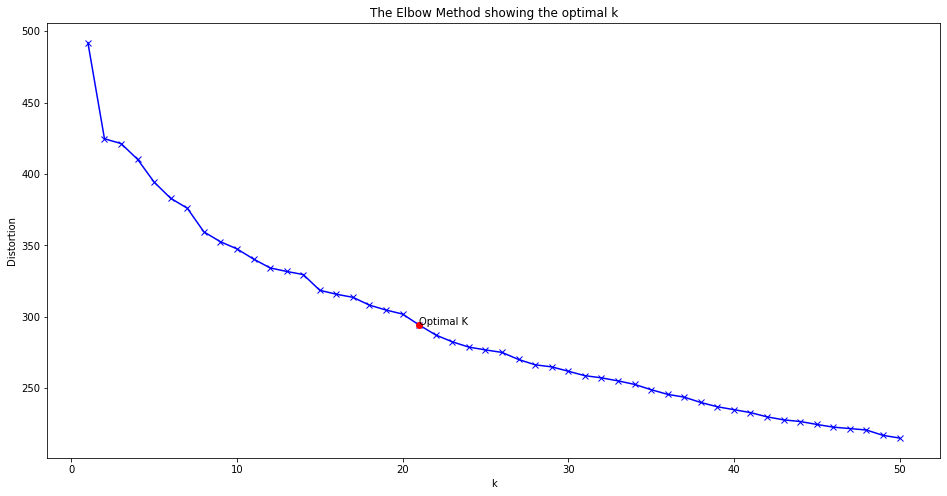

In [27]:
plt.figure(figsize=(16,8))
plt.plot(kclusters, distortions, 'bx-')
plt.plot(21,distortions[20],'ro')
plt.annotate("Optimal K", (21,distortions[20]))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [23]:
diffs = []
for i in range(len(distortions)-1):
    diffs.append(distortions[i] - distortions[i+1])

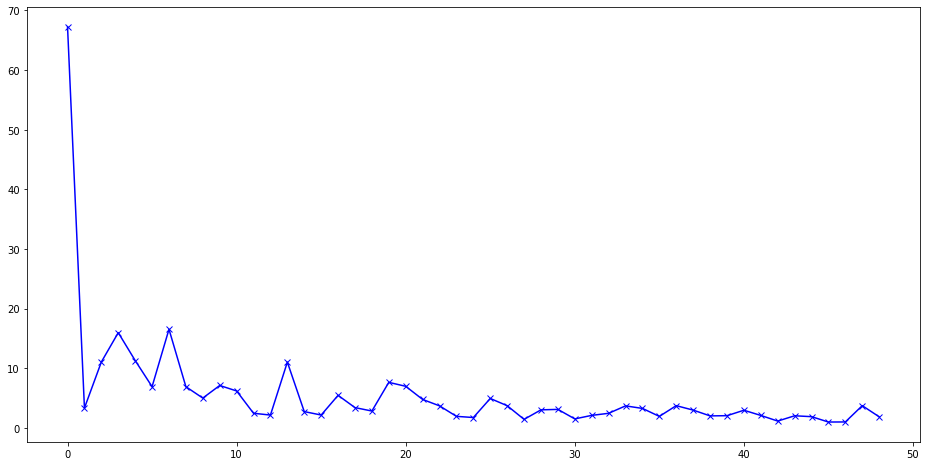

In [25]:
plt.figure(figsize=(16,8))
plt.plot(range(len(distortions)-1),diffs,'bx-')
plt.show()

Model for Best K (K=21)

In [28]:
BestK = 21

kmeans = KMeans(n_clusters=BestK, random_state=0).fit(ny_grouped_clustering)
kmeans.labels_

array([11, 11,  7, ..., 18,  7, 18])

In [29]:
zip_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

zip_venues_sorted.set_index('Zip',inplace=True)
ny_merged = pd.merge(left=ny,right=zip_venues_sorted,left_on='Zip',right_on='Zip',how='left')

ny_merged.head() 

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Cluster Labels,1st Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,13758,East Pharsalia,NY,42.583518,-75.721931,-5,1,"42.583518,-75.721931",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11101,Long Island City,NY,40.745341,-73.939070,-5,1,"40.745341,-73.93907",7.0,Cocktail Bar,...,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish Market
2,10023,New York,NY,40.776099,-73.982850,-5,1,"40.776099,-73.98285",7.0,Italian Restaurant,...,French Restaurant,Café,Theater,Plaza,Concert Hall,Pharmacy,Dessert Shop,Lounge,Playground,Grocery Store
3,10292,New York,NY,40.780751,-73.977182,-5,1,"40.780751,-73.977182",9.0,Exhibit,...,Mediterranean Restaurant,Italian Restaurant,History Museum,Mexican Restaurant,Sushi Restaurant,Farmers Market,Restaurant,Science Museum,Sandwich Place,Paper / Office Supplies Store
4,14009,Arcade,NY,42.582693,-78.400690,-5,1,"42.582693,-78.40069",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
print("Total Rows: ",len(ny_merged))
print("Total Of Rows with Values: ",len(ny_merged[ny_merged['Cluster Labels'].astype(str) != 'nan']))

Total Rows:  2281
Total Of Rows with Values:  1092


In [31]:
ny_merged = ny_merged[ny_merged['Cluster Labels'].astype(str) != 'nan']
ny_merged.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Cluster Labels,1st Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
1,11101,Long Island City,NY,40.745341,-73.939070,-5,1,"40.745341,-73.93907",7.0,Cocktail Bar,...,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish Market
2,10023,New York,NY,40.776099,-73.982850,-5,1,"40.776099,-73.98285",7.0,Italian Restaurant,...,French Restaurant,Café,Theater,Plaza,Concert Hall,Pharmacy,Dessert Shop,Lounge,Playground,Grocery Store
3,10292,New York,NY,40.780751,-73.977182,-5,1,"40.780751,-73.977182",9.0,Exhibit,...,Mediterranean Restaurant,Italian Restaurant,History Museum,Mexican Restaurant,Sushi Restaurant,Farmers Market,Restaurant,Science Museum,Sandwich Place,Paper / Office Supplies Store
5,12903,Plattsburgh,NY,44.683468,-73.446390,-5,1,"44.683468,-73.44639",18.0,Track,...,Coffee Shop,Sandwich Place,Convenience Store,Bank,Brewery,Factory,Falafel Restaurant,Exhibit,Farm,Farmers Market
7,14613,Rochester,NY,43.182163,-77.637940,-5,1,"43.182163,-77.63794",18.0,Grocery Store,...,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop


In [49]:
ny_merged.to_csv('./state_merged/ny_merged.csv',index=False)

In [50]:
map_clusters = folium.Map(location=[42.7128, -76.0060], zoom_start=7)

x = np.arange(BestK)
ys = [i + x + (i*x)**2 for i in range(BestK)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(ny_merged['Latitude'], ny_merged['Longitude'], ny_merged['Zip'], ny_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Getting NY Cluster

In [51]:
ny_merged = pd.read_csv('./state_merged/ny_merged.csv')
ny_merged.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Cluster Labels,1st Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,11101,Long Island City,NY,40.745341,-73.939070,-5,1,"40.745341,-73.93907",7.0,Cocktail Bar,...,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish Market
1,10023,New York,NY,40.776099,-73.982850,-5,1,"40.776099,-73.98285",7.0,Italian Restaurant,...,French Restaurant,Café,Theater,Plaza,Concert Hall,Pharmacy,Dessert Shop,Lounge,Playground,Grocery Store
2,10292,New York,NY,40.780751,-73.977182,-5,1,"40.780751,-73.977182",9.0,Exhibit,...,Mediterranean Restaurant,Italian Restaurant,History Museum,Mexican Restaurant,Sushi Restaurant,Farmers Market,Restaurant,Science Museum,Sandwich Place,Paper / Office Supplies Store
3,12903,Plattsburgh,NY,44.683468,-73.446390,-5,1,"44.683468,-73.44639",18.0,Track,...,Coffee Shop,Sandwich Place,Convenience Store,Bank,Brewery,Factory,Falafel Restaurant,Exhibit,Farm,Farmers Market
4,14613,Rochester,NY,43.182163,-77.637940,-5,1,"43.182163,-77.63794",18.0,Grocery Store,...,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop


New York Type Distribution

In [53]:
ny_merged['Cluster Labels'].value_counts().to_frame()

,Cluster Labels
18.0,360
7.0,315
9.0,112
3.0,75
11.0,40
13.0,24
20.0,19
14.0,18
10.0,17
6.0,16


# Preparing Training/Test Samples for KNN

In [85]:
ny_cluster = ny_merged.loc[:,['Zip','Cluster Labels']].groupby(['Zip','Cluster Labels']).head()
ny_cluster['Cluster Labels'] = ny_cluster['Cluster Labels'].astype(int)
ny_cluster.head()

,Zip,Cluster Labels
0,11101,7
1,10023,7
2,10292,9
3,12903,18
4,14613,18


In [86]:
ny_cluster.Zip.value_counts().to_frame().Zip.unique()

array([1], dtype=int64)

In [87]:
ny_cl = pd.merge(left=ny_grouped,right=ny_cluster,on='Zip',how='left')
ny_cl

,Zip,ATM,Accessories Store,Adult Education Center,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Service,Airport Tram,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Cluster Labels
0,501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,11
1,544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,11
2,6390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.333333,0.0,7
3,10001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,18
4,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.020408,0.0,0.0,0.020408,0.0,0.000000,0.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,14870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,18
1088,14872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1
1089,14880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,18
1090,14901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,7


In [183]:
x = ny_cl.iloc[:,1:-1]
x.head()

,ATM,Accessories Store,Adult Education Center,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Service,Airport Tram,American Restaurant,...,Waterfall,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.333333,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.020408,0.0,0.0,0.020408,0.0,0.000000,0.0


In [184]:
y = ny_cl.iloc[:,-1].values
y[0:5]

array([11, 11,  7, 18, 18])

In [185]:
X= preprocessing.StandardScaler().fit(x).transform(x)
X[0:5]

array([[-4.42714875e-02, -4.23511357e-02, -3.02752421e-02, ...,
        -1.54380407e-01, -3.02752421e-02, -3.02752421e-02],
       [-4.42714875e-02, -4.23511357e-02, -3.02752421e-02, ...,
        -1.54380407e-01, -3.02752421e-02, -3.02752421e-02],
       [-4.42714875e-02, -4.23511357e-02, -3.02752421e-02, ...,
        -1.54380407e-01,  3.30302891e+01, -3.02752421e-02],
       [-4.42714875e-02, -4.23511357e-02, -3.02752421e-02, ...,
        -1.54380407e-01, -3.02752421e-02, -3.02752421e-02],
       [-4.42714875e-02, -4.23511357e-02, -3.02752421e-02, ...,
        -1.54380407e-01, -3.02752421e-02, -3.02752421e-02]])

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =22)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (764, 445) (764,)
Test set: (328, 445) (328,)


# K Nearest Neighbor(KNN) Model For NY

## Determine Best K for KNN

In [187]:
limit = 35
mean_test = np.zeros((limit-1))
mean_train = np.zeros((limit-1))
res_train = []
res_test = []

for bestk in range(1,limit): 
    neigh = KNeighborsClassifier(n_neighbors = bestk).fit(X_train,y_train)
    
    #Train Results
    yhat = neigh.predict(X_train)
    mean_train[bestk-1] = metrics.accuracy_score(y_train, yhat)
    res_train.append("K = " + str(bestk) + "; With acc = " + str(mean_train[bestk-1]))
    
    #Test Results
    yhat = neigh.predict(X_test)
    mean_test[bestk-1] = metrics.accuracy_score(y_test, yhat)
    res_test.append("K = " + str(bestk) + "; With acc = " + str(mean_test[bestk-1]))
    
mean_test

array([0.64939024, 0.57317073, 0.625     , 0.5945122 , 0.58841463,
       0.56097561, 0.53658537, 0.50914634, 0.47865854, 0.46341463,
       0.44207317, 0.41463415, 0.39939024, 0.35670732, 0.3445122 ,
       0.32317073, 0.31402439, 0.27439024, 0.2652439 , 0.23780488,
       0.23170732, 0.22256098, 0.21646341, 0.21341463, 0.20121951,
       0.19207317, 0.17073171, 0.16158537, 0.1554878 , 0.1554878 ,
       0.1554878 , 0.15243902, 0.15243902, 0.15243902])

[0.64939024 0.57317073 0.625      0.5945122  0.58841463 0.56097561
 0.53658537 0.50914634 0.47865854 0.46341463 0.44207317 0.41463415
 0.39939024 0.35670732 0.3445122  0.32317073 0.31402439 0.27439024
 0.2652439  0.23780488 0.23170732 0.22256098 0.21646341 0.21341463
 0.20121951 0.19207317 0.17073171 0.16158537 0.1554878  0.1554878
 0.1554878  0.15243902 0.15243902 0.15243902]


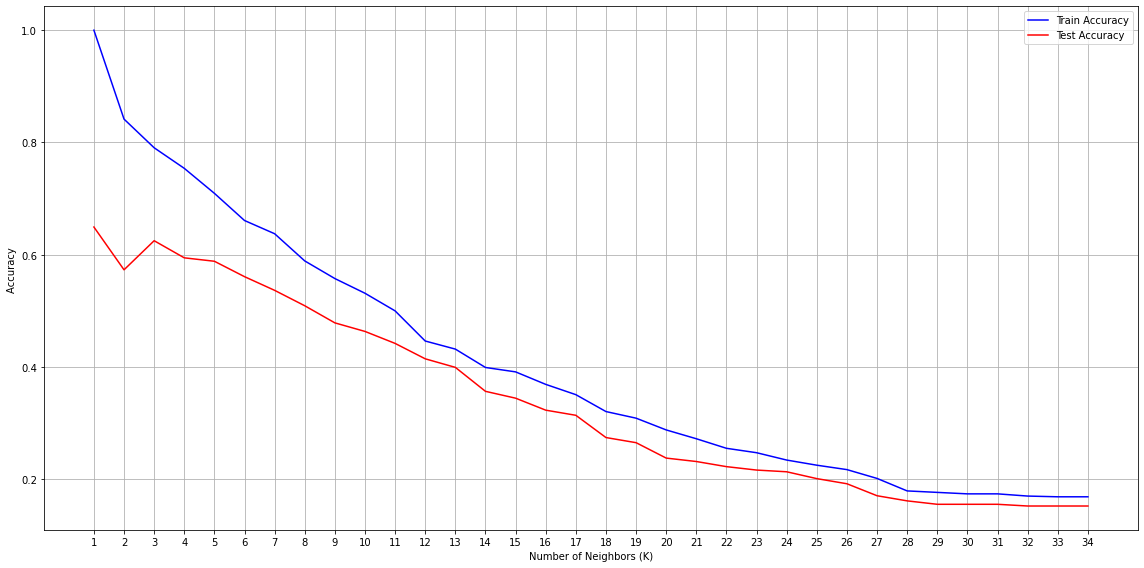

In [188]:
print(mean_test)

plt.figure(figsize=(16,8))

line1, = plt.plot(range(1,limit), mean_train, 'b', label="Train Acc")
line2, = plt.plot(range(1,limit), mean_test, 'r', label="Test Acc")

plt.legend(('Train Accuracy','Test Accuracy'))
plt.ylabel('Accuracy ')
plt.xticks(range(1,limit))
plt.grid()
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [189]:
BestKnn = 5

In [191]:
neigh = KNeighborsClassifier(n_neighbors = BestKnn).fit(X_train,y_train)
yhat = neigh.predict(X_test)
mean_acc = metrics.accuracy_score(y_test, yhat)
std_acc = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])
print("K = " + str(BestKnn) + "; With acc = " + str(mean_acc))

K = 5; With acc = 0.5884146341463414


# Preparing other State data for model to predict Cluster Type

California Data

In [192]:
ca_venues = pd.read_csv("./state_venues/ca_venues.csv")
ca_venues.head()

,Zip,Zip Latitude,Zip Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes
0,96157,38.934409,-119.976707,4c17d5924ff90f47a5830d49,The Cork & More,38.933938,-119.975195,Gourmet Shop,8
1,96157,38.934409,-119.976707,4b664e74f964a5204d1d2be3,Rite Aid,38.933294,-119.976270,Pharmacy,10
2,96157,38.934409,-119.976707,4ca10fff54c8a1cd89fda44b,Sierra Pizza,38.934137,-119.975207,Pizza Place,4
3,96157,38.934409,-119.976707,4cfefcf466ee9eb0d126a74e,U.S. Bank ATM,38.933327,-119.977466,ATM,0
4,96157,38.934409,-119.976707,4e4d2eabbd413c4cc66f3c5d,Domino's Pizza,38.933518,-119.978390,Pizza Place,1


Florida Data

In [193]:
fl_venues = pd.read_csv("./state_venues/fl_venues.csv")
fl_venues.head()

,Zip,Zip Latitude,Zip Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes
0,34223,26.974858,-82.36650,56c5eee6cd10be6d788baef4,Artist Acres,26.976016,-82.364925,Botanical Garden,0
1,32819,28.463509,-81.47514,59c80763c0cacb2977c188db,Honu Ika Moana,28.462502,-81.474479,Water Park,8
2,32819,28.463509,-81.47514,596ac393a9fe12520f4c8a8b,Americana At Cabana Bay,28.464215,-81.472800,Hotel,15
3,32819,28.463509,-81.47514,513b44fde4b012e807e704a7,Universal's Cabana Bay Beach Resort,28.465881,-81.473730,Resort,700
4,32819,28.463509,-81.47514,53303c90498ec9a188989b35,Starbucks,28.465311,-81.473596,Coffee Shop,43


Nevada Data

In [194]:
nv_venues = pd.read_csv("./state_venues/nv_venues.csv")
nv_venues.head()

,Zip,Zip Latitude,Zip Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes
0,89116,35.927901,-114.972061,5e28243eafe78b00085548b7,ADT Security Services,35.928172,-114.971849,Business Service,0.0
1,89702,39.135503,-119.758750,5bce7ce1835c9a002c4deb8a,Joe's Painting,39.135476,-119.759746,Construction & Landscaping,0.0
2,89702,39.135503,-119.758750,5cd66c9925ecca002cccc5ee,Peter Fishburn | Brown & Bigelow,39.137670,-119.757160,Advertising Agency,0.0
3,89048,36.218341,-116.009940,4f36df18e4b0f4cfde0397a6,Pahrump Valley Museum,36.219141,-116.007385,History Museum,1.0
4,89108,36.205718,-115.223630,4e8dcf93b8f71a700b458bb0,Sun City Express,36.203445,-115.223206,Convenience Store,1.0


Washington Data

In [195]:
wa_venues = pd.read_csv("./state_venues/wa_venues.csv")
wa_venues.head()

,Zip,Zip Latitude,Zip Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes
0,99210,47.653568,-117.431742,5709c5c6498ed1c136cd2231,Iron Goat Brewing Co.,47.654579,-117.431340,Brewery,26.0
1,99210,47.653568,-117.431742,4b140a16f964a5203d9c23e3,Frank's Diner,47.654754,-117.434464,Diner,87.0
2,99210,47.653568,-117.431742,4b5a79e3f964a52064c728e3,Sushiyama,47.653186,-117.432055,Sushi Restaurant,1.0
3,99210,47.653568,-117.431742,5d827d8e2dda0a00088df665,Starbucks,47.653327,-117.434369,Coffee Shop,0.0
4,99210,47.653568,-117.431742,4b43fdfef964a520c2ef25e3,Linnie's Thai Cuisine,47.653203,-117.431106,Thai Restaurant,6.0


In [196]:
all_venues = pd.concat([ca_venues,fl_venues,nv_venues,wa_venues],ignore_index=True)
all_venues

,Zip,Zip Latitude,Zip Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes
0,96157,38.934409,-119.976707,4c17d5924ff90f47a5830d49,The Cork & More,38.933938,-119.975195,Gourmet Shop,8.0
1,96157,38.934409,-119.976707,4b664e74f964a5204d1d2be3,Rite Aid,38.933294,-119.976270,Pharmacy,10.0
2,96157,38.934409,-119.976707,4ca10fff54c8a1cd89fda44b,Sierra Pizza,38.934137,-119.975207,Pizza Place,4.0
3,96157,38.934409,-119.976707,4cfefcf466ee9eb0d126a74e,U.S. Bank ATM,38.933327,-119.977466,ATM,0.0
4,96157,38.934409,-119.976707,4e4d2eabbd413c4cc66f3c5d,Domino's Pizza,38.933518,-119.978390,Pizza Place,1.0
...,...,...,...,...,...,...,...,...,...
13335,98595,46.887187,-124.107350,4b120d47f964a5209e8823e3,Surf Shop,46.888243,-124.104396,Surf Spot,4.0
13336,98595,46.887187,-124.107350,5583357c498eefc42f7da8f0,Shop'n Kart,46.886189,-124.103867,Grocery Store,4.0
13337,98565,46.580105,-122.906990,4c181d4ad4d9c9284c05ef29,Magnet Shaddock Park,46.578703,-122.907200,Park,0.0
13338,98009,47.432251,-121.803388,5f8e8e496fdafe4122b99fe1,Ma Petite Mer,47.432418,-121.803705,Jewelry Store,0.0


In [197]:
# one hot encoding
all_onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
all_onehot['Zip'] = all_venues['Zip'] 

# move neighborhood column to the first column
fixed_columns = [all_onehot.columns[-1]] + list(all_onehot.columns[:-1])
all_onehot = all_onehot[fixed_columns]

all_onehot.head()

,Zip,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,96157,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,96157,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96157,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,96157,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,96157,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
all_grouped = all_onehot.groupby('Zip').mean().reset_index()
all_grouped

,Zip,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,32013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,99319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2808,99324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2809,99329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2810,99336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
InnerCol = []
for col in ny_grouped.columns.to_list():
    if col in all_grouped.columns.to_list():
        InnerCol.append(col)
len(InnerCol)

381

In [200]:
NyNotInAll = []
for col in ny_grouped.columns.to_list():
    if col not in all_grouped.columns.to_list():
        NyNotInAll.append(col)
len(NyNotInAll)

65

Complement all_venues columns:

In [201]:
for col in NyNotInAll:
    all_grouped[col] = 0
all_grouped.head()

,Zip,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,...,Swiss Restaurant,TV Station,Tattoo Parlor,Taxi,Toll Plaza,Tonkatsu Restaurant,Town,Train,Transportation Service,Zoo Exhibit
0,32013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,32034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,32038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,32041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,32056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
x = all_grouped.loc[:,ny_grouped.columns.to_list()[1:]]
x.head()

,ATM,Accessories Store,Adult Education Center,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Service,Airport Tram,American Restaurant,...,Waterfall,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [207]:
X= preprocessing.StandardScaler().fit(x).transform(x)
X[0:5]

array([[-0.0560736 , -0.03371544,  0.        , ..., -0.05445434,
        -0.02641021,  0.        ],
       [-0.0560736 , -0.03371544,  0.        , ..., -0.05445434,
        -0.02641021,  0.        ],
       [-0.0560736 , -0.03371544,  0.        , ..., -0.05445434,
        -0.02641021,  0.        ],
       [-0.0560736 , -0.03371544,  0.        , ..., -0.05445434,
        -0.02641021,  0.        ],
       [-0.0560736 , -0.03371544,  0.        , ..., -0.05445434,
        -0.02641021,  0.        ]])

# Predicting Cluster of NY in NV, CA, WA, and FL

In [208]:
yhat_all = neigh.predict(X)
yhat_all[0:10]

array([13, 18, 18,  3, 18, 18, 18,  3, 13, 11])

In [212]:
all_results =  all_grouped.loc[:,ny_grouped.columns.to_list().copy()]
all_results.head()

,Zip,ATM,Accessories Store,Adult Education Center,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Service,Airport Tram,...,Waterfall,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,32013,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,32034,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,32038,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,32041,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,32056,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [213]:
all_results['Cluster Labels'] = yhat_all
all_results = all_results.loc[:,['Zip','Cluster Labels']].groupby(['Zip','Cluster Labels']).head()
all_results

,Zip,Cluster Labels
0,32013,13
1,32034,18
2,32038,18
3,32041,3
4,32056,18
...,...,...
2807,99319,18
2808,99324,14
2809,99329,13
2810,99336,3


In [214]:
res_zip = pd.merge(left=raw.loc[raw.State.str.contains('(?i)WA|FL|CA|NV'),['Zip','State']],right=all_results,on='Zip',how='inner')
res_zip

,Zip,State,Cluster Labels
0,32886,FL,18
1,91605,CA,3
2,91102,CA,3
3,95019,CA,1
4,34669,FL,18
...,...,...,...
2807,90053,CA,3
2808,94702,CA,18
2809,94115,CA,3
2810,33501,FL,18


In [215]:
zip_grouped = res_zip.groupby(['State','Cluster Labels']).count()
zip_grouped.reset_index(inplace=True)
zip_grouped

,State,Cluster Labels,Zip
0,CA,0,12
1,CA,1,14
2,CA,2,7
3,CA,3,803
4,CA,4,8
...,...,...,...
66,WA,14,6
67,WA,15,3
68,WA,17,2
69,WA,18,88


In [216]:
ny_zip = ny_cl.loc[:,['Zip','Cluster Labels']]
ny_zip['State'] = 'NY'
ny_zip_grouped = ny_zip.groupby(['State','Cluster Labels']).count()
ny_zip_grouped.reset_index(inplace=True)
ny_zip_grouped

,State,Cluster Labels,Zip
0,NY,0,11
1,NY,1,12
2,NY,2,7
3,NY,3,75
4,NY,4,13
5,NY,5,8
6,NY,6,16
7,NY,7,315
8,NY,8,14
9,NY,9,112


In [217]:
all_zips_grouped = pd.merge(left=zip_grouped,right=ny_zip_grouped,on='Cluster Labels',how='left',suffixes=('','_ny'))
all_zips_grouped['zip_count_diff'] = abs(all_zips_grouped.Zip - all_zips_grouped.Zip_ny)
all_zips_grouped.head(20)

,State,Cluster Labels,Zip,State_ny,Zip_ny,zip_count_diff
0,CA,0,12,NY,11,1
1,CA,1,14,NY,12,2
2,CA,2,7,NY,7,0
3,CA,3,803,NY,75,728
4,CA,4,8,NY,13,5
5,CA,5,7,NY,8,1
6,CA,6,10,NY,16,6
7,CA,7,55,NY,315,260
8,CA,8,3,NY,14,11
9,CA,9,26,NY,112,86


In [218]:
min_vals = all_zips_grouped.loc[:,['Cluster Labels','zip_count_diff']].groupby(['Cluster Labels']).min()
min_vals.reset_index(inplace=True)
min_vals.head(20)

,Cluster Labels,zip_count_diff
0,0,1
1,1,2
2,2,0
3,3,42
4,4,4
5,5,1
6,6,6
7,7,250
8,8,6
9,9,86


In [219]:
final_results = pd.merge(left = all_zips_grouped,right=min_vals,on=['Cluster Labels','zip_count_diff'],how='inner',suffixes=('','_min'))
final_results.sort_values('Cluster Labels')

,State,Cluster Labels,Zip,State_ny,Zip_ny,zip_count_diff
0,CA,0,12,NY,11,1
1,CA,1,14,NY,12,2
2,CA,2,7,NY,7,0
20,WA,3,117,NY,75,42
11,FL,4,9,NY,13,4
3,CA,5,7,NY,8,1
4,CA,6,10,NY,16,6
12,FL,7,65,NY,315,250
13,FL,8,8,NY,14,6
5,CA,9,26,NY,112,86


In [220]:
final_results['State'].value_counts().to_frame()

,State
FL,10
CA,10
WA,1


In [226]:
final_results.loc[:,['State','zip_count_diff']].groupby('State').sum()

,zip_count_diff
State,
CA,119
FL,397
WA,42


In [228]:
all_zips_grouped.loc[:,['State','zip_count_diff']].groupby('State').sum()

,zip_count_diff
State,
CA,1333
FL,767
NV,944
WA,869


In [221]:
all_results['Cluster Labels'].unique()

array([13, 18,  3, 11,  2,  7,  0, 20, 15,  9,  6,  4,  8,  1, 12, 14, 17,
       10,  5, 16])

In [231]:
allv = pd.concat([ca_venues,fl_venues,ny_venues,wa_venues,nv_venues],ignore_index=True)
allv.head()

,Zip,Zip Latitude,Zip Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes
0,96157,38.934409,-119.976707,4c17d5924ff90f47a5830d49,The Cork & More,38.933938,-119.975195,Gourmet Shop,8.0
1,96157,38.934409,-119.976707,4b664e74f964a5204d1d2be3,Rite Aid,38.933294,-119.976270,Pharmacy,10.0
2,96157,38.934409,-119.976707,4ca10fff54c8a1cd89fda44b,Sierra Pizza,38.934137,-119.975207,Pizza Place,4.0
3,96157,38.934409,-119.976707,4cfefcf466ee9eb0d126a74e,U.S. Bank ATM,38.933327,-119.977466,ATM,0.0
4,96157,38.934409,-119.976707,4e4d2eabbd413c4cc66f3c5d,Domino's Pizza,38.933518,-119.978390,Pizza Place,1.0


In [239]:
t_likes = pd.merge(left=raw.loc[raw.State.str.contains('(?i)WA|FL|CA|NV|NY'),['Zip','State']],right=allv,on='Zip',how='left')
t_likes = t_likes[t_likes.Likes.astype(str).apply(lambda x: x != "nan")]
t_likes.head()

,Zip,State,Zip Latitude,Zip Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes
6,11757,NY,40.690049,-73.37442,4d57f7b15ba05481e53c0b46,Black Forest Bakery,40.687898,-73.374617,Bakery,12.0
7,11757,NY,40.690049,-73.37442,4ad92c7df964a520d81821e3,Village Lanterne,40.687972,-73.374825,German Restaurant,47.0
8,11757,NY,40.690049,-73.37442,4d8ea211d265236a1ebd0f17,Village Pub,40.688376,-73.374710,Dive Bar,5.0
9,11757,NY,40.690049,-73.37442,4c45a0b0f97fbe9a03c3bc30,Lindenhurst Bagels & Deli,40.688150,-73.375118,Bagel Shop,6.0
10,11757,NY,40.690049,-73.37442,4fac40e7e4b00ef465574594,Bodyshop Fitness,40.687577,-73.374113,Gym,11.0


In [240]:
t_likes.loc[:,['State','Likes']].groupby('State').sum()

,Likes
State,
CA,213478.0
FL,62680.0
NV,2959.0
NY,1901599.0
WA,33397.0
